## Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Read the cleaned data

In [4]:
consumption = pd.read_csv('../cleaned_data/consumption.csv',index_col='country')
generation_renewable = pd.read_csv('../cleaned_data/generation_renewable.csv',index_col='country')
generation_norenewable = pd.read_csv('../cleaned_data/generation_fossil.csv',index_col='country')
installations_renewable = pd.read_csv('../cleaned_data/capacity_renewable.csv',index_col='country')
installations_norenewable = pd.read_csv('../cleaned_data/capacity_fossil.csv',index_col='country')
imports = pd.read_csv('../cleaned_data/imports.csv',index_col='country')
exports = pd.read_csv('../cleaned_data/exports.csv',index_col='country')
population = pd.read_csv('../cleaned_data/population.csv',index_col='country')


# 1. What countries are the TOP 10 cleanest and the TOP10  contaminants in 2017?
*As function of most generations and installation of renewables sources's energies.*

In [5]:
max_gen_renewables = generation_renewable.T.iloc[['37']] #choose the 2017 year
max_gen_norenewables = generation_norenewable.T.iloc[['37']]

print(f'''

TOP 10 COUNTRIES WITH MORE GENERATION OF RENWEABLES
{max_gen_renewables.T.sort_values('2017',ascending= False).head(10)}

TOP 10 COUNTRIES WITH MORE GENERATION OF RENWEABLES
{max_gen_norenewables.T.sort_values('2017',ascending= False).head(10)}

''')




TOP 10 COUNTRIES WITH MORE GENERATION OF RENWEABLES
                    2017
country                 
China          1224.9900
Brazil          419.4520
Canada          395.9990
India           170.4410
Norway          141.6170
Japan           123.4490
Sweden           78.4080
United States    77.2765
Vietnam          70.2460
Venezuela        64.1990

TOP 10 COUNTRIES WITH MORE GENERATION OF RENWEABLES
                      2017
country                   
China          4397.628000
United States  2536.108892
India          1155.784000
Japan           770.705000
South Korea     369.656000
Saudi Arabia    326.834000
Iran            267.889000
Mexico          243.988000
Taiwan          216.474000
South Africa    213.279000




# 2. Check the HUGE DIFFERENCE in quantities of billions of Kwh... this is the most interesting hint to follow the problem

# Taking a look of data

## Plot some important countries as function of:

**Consumption**

**Generation Renewable**

**Generation Fossile**

**Capacity(installations) Renewable**

**Capacity(installations) Fossile**

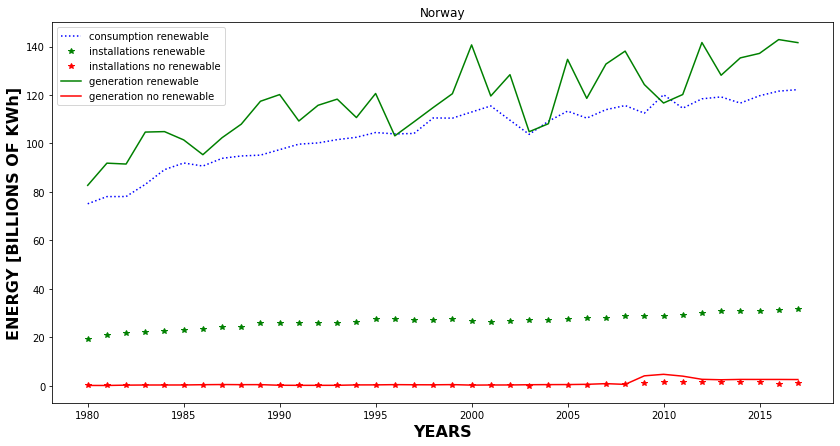

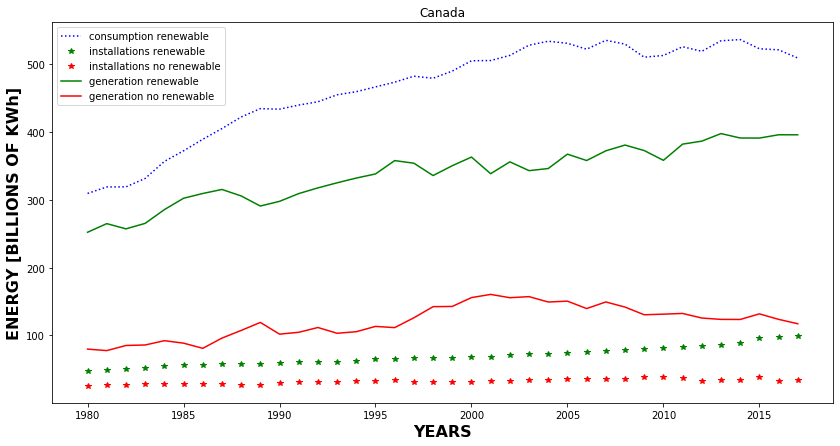

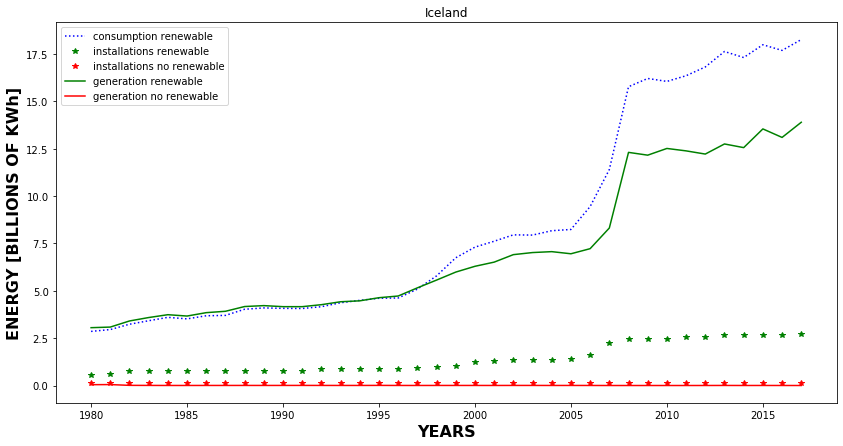

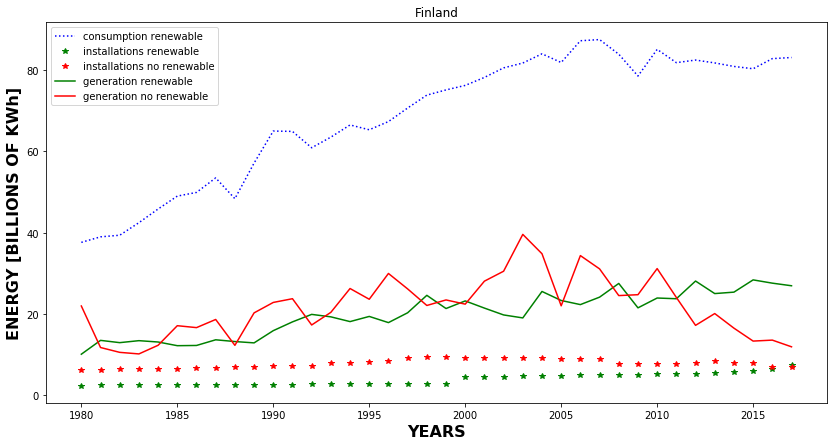

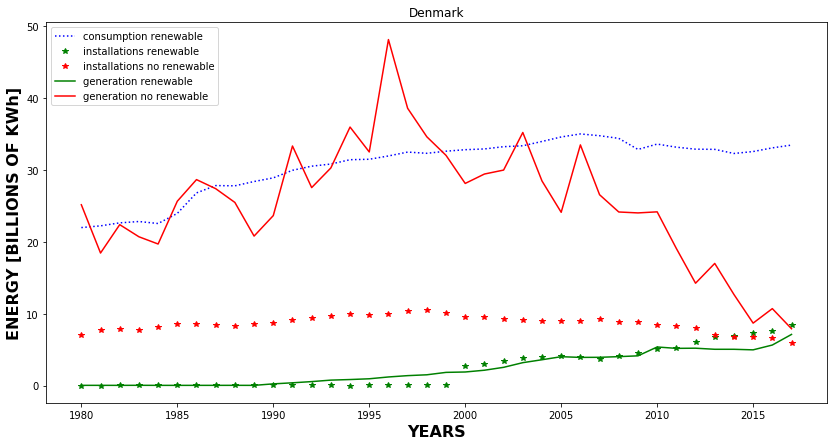

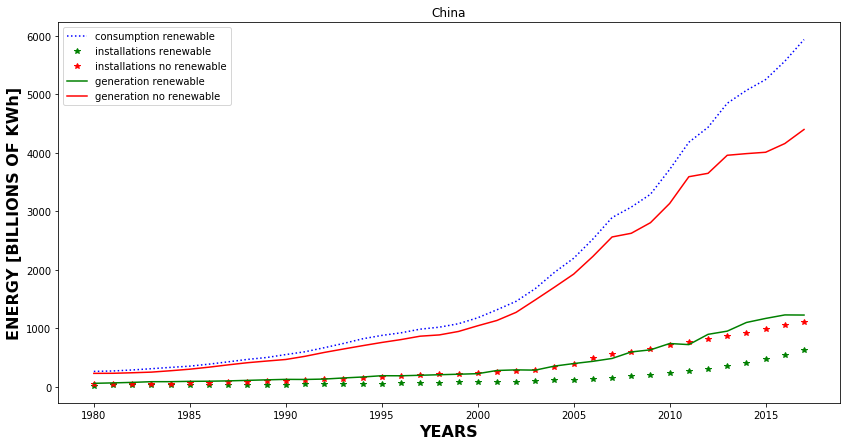

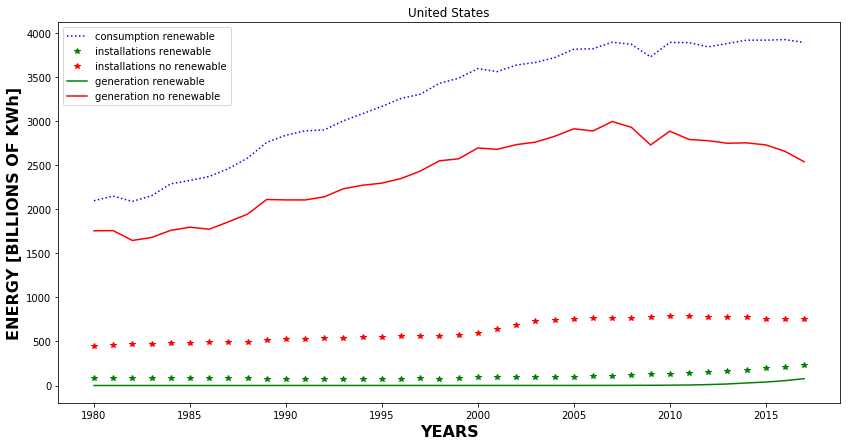

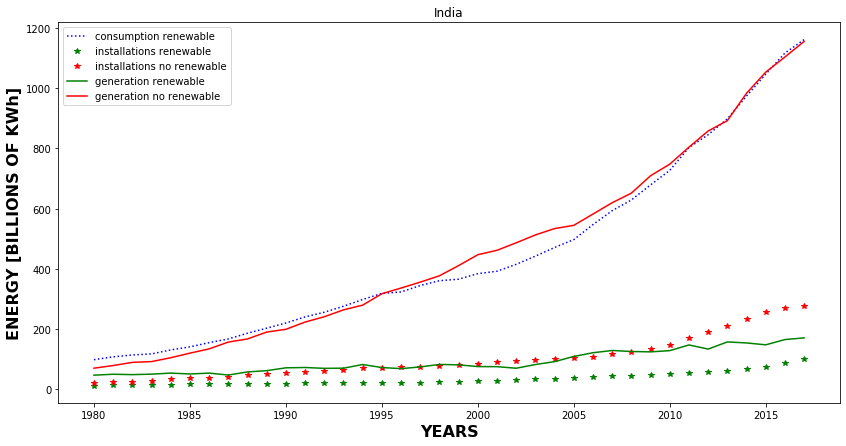

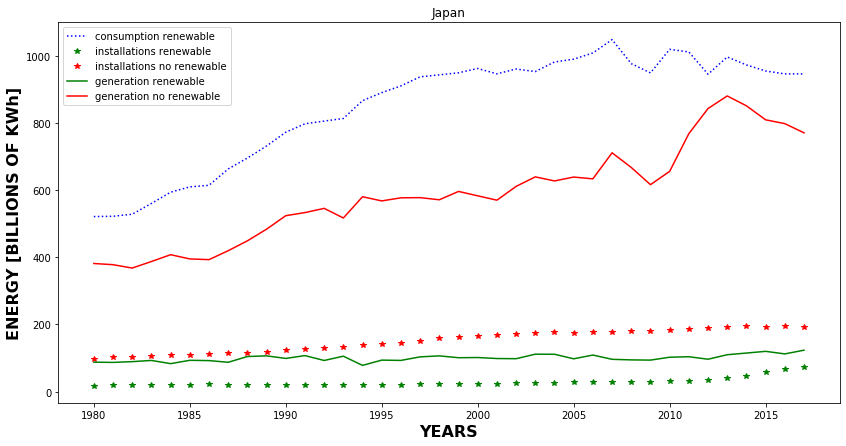

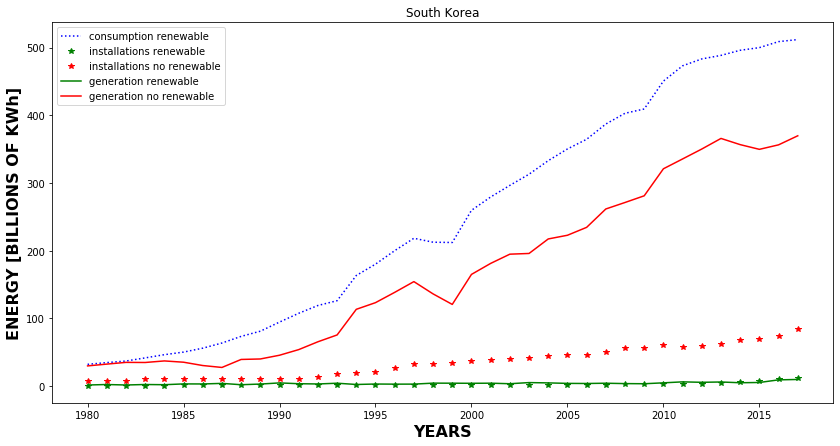

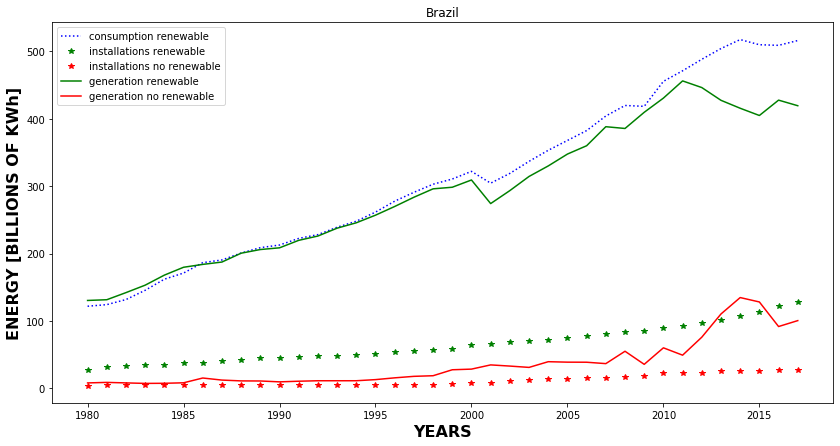

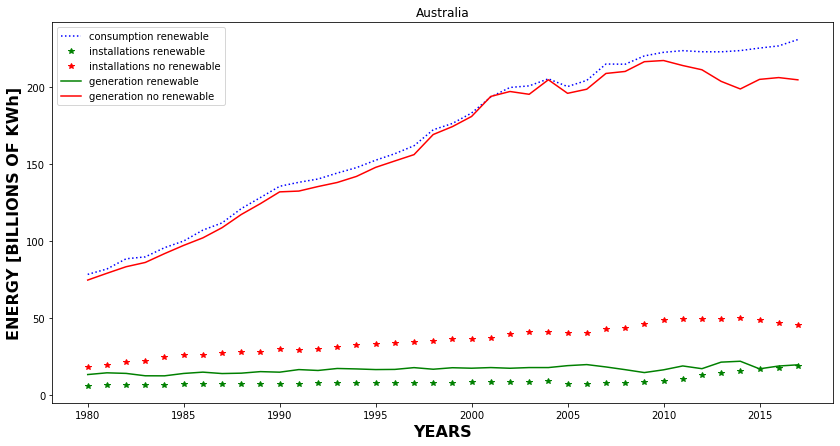

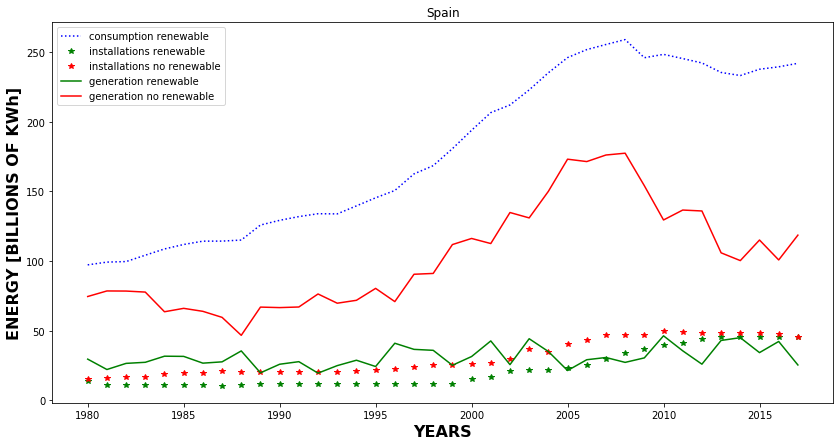

In [23]:
countries= list(['Norway','Canada','Iceland','Finland','Denmark','China','United States','India','Japan','South Korea','Brazil','Australia','Spain'])

t = np.arange(1980,2018,1)

for item in countries:
    fig,ax = plt.subplots(1, figsize=(14,7))
    plt.plot(t,consumption[item:item].T, 'b:', label= 'consumption renewable')
    plt.plot(t,installations_renewable[item:item].T, 'g*', label='installations renewable')
    plt.plot(t,installations_norenewable[item:item].T, 'r*', label='installations no renewable')
    plt.plot(t,generation_renewable[item:item].T, 'g', label='generation renewable')
    plt.plot(t,generation_norenewable[item:item].T, 'r', label='generation no renewable')
    plt.legend = ax.legend(loc='upper left')
    plt.xlabel('YEARS',fontsize=16,fontweight='bold')
    plt.ylabel('ENERGY [BILLIONS OF KWh]',fontsize=16,fontweight='bold')
    plt.title(item)
    fig.savefig(f'../explored_data/plots_countries/{item}.png')

plt.show()


# 3. Analysis for the *Generation renowable ratio* for all countries: 

### Create a 'CLEAN RATIO' that measures the countries which spent more renewable energy from the total consumption

## With this data we show a current pictures of the countries as function of the kind of energy consumped in 2017 as function of total net electricity and population.


In [25]:
GNRE2017 = generation_norenewable[['2017']]
GRE2017 = generation_renewable[['2017']]
consumption2017 = consumption[['2017']]
population2017 = population[['2017']] 
INRE2017 = installations_norenewable[['2017']]
IRE2017 = installations_renewable[['2017']]


#MERGE THE THREE TABLES IN ONE.
difference0 = consumption2017.merge(population2017, how = 'outer',on = 'country',suffixes=('_cons','_RE'))
difference0 = difference0.merge(GRE2017, how = 'outer',on = 'country',suffixes=('_1','_2'))
difference0 = difference0.merge(GNRE2017, how = 'outer',on = 'country',suffixes=('_3','_4'))
difference0 = difference0.merge(IRE2017, how = 'outer',on = 'country',suffixes=('_5','_6'))
ratio = difference0.merge(INRE2017, how = 'outer',on = 'country',suffixes=('_7','_8'))
ratio.rename(columns={'2017_cons':'consumption_2017','2017_RE':'population_2017','2017_3':'gen_renewable_2017','2017_4':'gen_no_renewable_2017','2017_7':'inst_renewable_2017','2017_8':'inst_no_renewable_2017'},inplace=True)

#CREATE FOLLOWING COLUMNS: RATIO CLEAN COUNTRY GENERATION, RATIO CLEAN COUNTRY INSTALLATION, RATIO CONSUMPTION BY POPULATION

ratio['ratio_clean_generation'] = 100*ratio['gen_renewable_2017']/ratio['consumption_2017']
ratio['ratio_clean_installation'] = 100*ratio['inst_renewable_2017']/ratio['consumption_2017']
ratio['ratio_consumption_pop'] = 1000 *ratio['consumption_2017']/ratio['population_2017']
ratio
#DROP THE INITIAL COLUMNS, BECAUSE ARE USELESS TO PROVIDE INFORMATION
ratio.drop('consumption_2017',axis=1,inplace=True)
ratio.drop('gen_renewable_2017',axis=1,inplace=True)
ratio.drop('gen_no_renewable_2017',axis=1,inplace=True)
ratio.drop('inst_renewable_2017',axis=1,inplace=True)
ratio.drop('inst_no_renewable_2017',axis=1,inplace=True)

ratio.dropna(inplace=True)

In [26]:
ratio.to_csv('../explored_data/ratios.csv')

In [27]:
ratio.sample(10)

,population_2017,ratio_clean_generation,ratio_clean_installation,ratio_consumption_pop
country,,,,
Saudi Arabia,32956.150,0.000000,0.031232,8.938271
Nigeria,191138.300,21.316943,8.306511,0.134913
Puerto Rico,3664.480,0.431455,2.609950,3.858174
Benin,11194.770,0.088889,3.644444,0.100493
Ethiopia,106486.700,119.747371,40.055519,0.100812
Guinea,12755.250,72.541113,25.102783,0.118991
Canada,36489.210,77.759538,19.339592,13.956482
Senegal,15444.650,10.700027,5.669417,0.243256
Guatemala,16915.780,81.822709,27.440239,0.593529


# 4. Compute the annual variation for consumption of energy (net, renewable and fossil).

## Computing the energetic absolute variation  from 1980

In [66]:
consumption

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.87606,0.92256,0.88536,0.93000,0.94767,0.96162,1.05555,1.13274,1.00440,1.01277,...,1.429049,2.027433,2.442759,3.033989,3.91916,4.59336,4.71533,4.86338,5.5253,5.77722
Albania,2.97400,2.98700,2.98100,2.97500,2.97700,3.03900,3.02700,3.44100,3.20500,3.43100,...,4.053000,4.302000,4.606500,5.086800,4.36990,4.55200,4.90600,5.07000,5.1100,5.03200
Algeria,5.91500,6.71300,7.73300,8.20700,8.95900,9.68600,10.34300,11.11900,11.95400,12.19000,...,30.500000,28.315000,33.840100,38.237000,43.06100,45.39400,49.40500,53.55900,55.9300,60.27100
American Samoa,0.06510,0.06231,0.06231,0.06603,0.06417,0.07719,0.06975,0.07533,0.08463,0.08370,...,0.173910,0.165540,0.147870,0.144150,0.14601,0.14508,0.14508,0.15159,0.1581,0.15531
Angola,0.73600,0.73700,0.81500,0.83200,0.86000,0.82600,0.88600,0.89400,0.89300,0.89900,...,3.648000,4.132000,4.690000,4.886000,5.33500,7.05000,8.14900,8.23100,9.0360,9.46900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wake Island,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000
Western Sahara,0.06696,0.06696,0.06789,0.06789,0.06789,0.06603,0.06882,0.07068,0.07161,0.07254,...,0.083700,0.083700,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000
Yemen,0.47100,0.50600,0.60700,0.66200,0.73800,0.78300,0.94900,1.05900,1.43200,1.44600,...,4.646000,4.700000,5.438000,4.244000,4.32200,5.80600,5.23200,4.20100,3.3120,3.33000


In [275]:
def absolute_variation(s):
    return 100*(s / s[0])  
consumption.apply(absolute_variation, axis=1)


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,100.0,105.307856,101.061571,106.157113,108.174098,109.766454,120.488323,129.299363,114.649682,115.605096,...,163.122309,231.426272,278.834669,346.322056,447.362053,524.320252,538.242814,555.142342,630.698811,659.454832
Albania,100.0,100.437122,100.235373,100.033625,100.100874,102.185609,101.782112,115.702757,107.767317,115.366510,...,136.281103,144.653665,154.892401,171.042367,146.936785,153.059852,164.963013,170.477471,171.822461,169.199731
Algeria,100.0,113.491124,130.735418,138.748943,151.462384,163.753170,174.860524,187.979713,202.096365,206.086221,...,515.638208,478.698225,572.106509,646.441251,727.996619,767.438715,835.249366,905.477599,945.562130,1018.951817
American Samoa,100.0,95.714286,95.714286,101.428571,98.571429,118.571429,107.142857,115.714286,130.000000,128.571429,...,267.142857,254.285714,227.142857,221.428571,224.285714,222.857143,222.857143,232.857143,242.857143,238.571429
Angola,100.0,100.135870,110.733696,113.043478,116.847826,112.228261,120.380435,121.467391,121.331522,122.146739,...,495.652174,561.413043,637.228261,663.858696,724.864130,957.880435,1107.201087,1118.342391,1227.717391,1286.548913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wake Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Western Sahara,100.0,100.000000,101.388889,101.388889,101.388889,98.611111,102.777778,105.555556,106.944444,108.333333,...,125.000000,125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Yemen,100.0,107.430998,128.874735,140.552017,156.687898,166.242038,201.486200,224.840764,304.033970,307.006369,...,986.411890,997.876858,1154.564756,901.061571,917.622081,1232.696391,1110.828025,891.932059,703.184713,707.006369


In [274]:
def relative_variation(s):
    d =pd.DataFrame()
    for i in range(len(s)):
        print(i)        
        #print(100*(s[i+1] /s[i]))
        #return s
relative_variation(consumption,)  
    
#consumption.apply(relative_variation, axis=0)

TypeError: relative_variation() got an unexpected keyword argument 'axis'

In [263]:
100*(consumption['1985'][0]/consumption['1984'][0])

101.4720314033366

In [102]:
consumption['1986']

country
Afghanistan       0.92256
Albania           2.98700
Algeria           6.71300
American Samoa    0.06231
Angola            0.73700
                   ...   
Wake Island       0.00000
Western Sahara    0.06696
Yemen             0.50600
Zambia            6.27300
Zimbabwe          7.03600
Name: 1981, Length: 188, dtype: float64

In [122]:
consumption.columns

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'],
      dtype='object')